In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
read_csv("https://raw.githubusercontent.com/sgvjlee23/DSCI1002023SGroup6/main/trial.csv") -> trial
trial|>
    mutate (Risk = as_factor (Risk)) -> trial

Rows: 776 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (17): Sector_score, PARA_A, SCORE_A, PARA_B, SCORE_B, TOTAL, numbers, Ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Title: Predicting Corporate Fraud Risks
This project aims to predict a firm's potential for fraudulent behavior by analyzing both current and historical risk factors. Our overarching goal is to develop a robust model capable of distinguishing between firms likely to engage in fraudulent activity and those unlikely to do so, based on their past and present financial activities.

Fraud typically involves deceptive maneuvers such as the manipulation or misrepresentation of financial data to secure unlawful gains. To facilitate an accurate classification, we're using the Trial dataset, which offers a rich mix of current inherent risk factors and historical control risk factors.

This data standardization forms the first step of our analysis, ensuring fairness and uniformity by aligning all variables to a comparable scale. Following this, we devise a classification recipe, a preparatory step that outlines how we'll transform the data for modeling.

Subsequently, we establish a tuning specification to identify the optimal number of K-neighbors for our K-nearest neighbors (KNN) model, followed by the setting up of a 5-fold cross-validation process. This division of the dataset into five subsets helps us to independently train and test the model, improving its reliability and minimizing dependency on any particular data partition.

Next, we construct a KNN model specification fitted to the training data, which enables us to generate predictions based on established relationships within the dataset. We encapsulate our recipe, model specification, and cross-validation process into a tuning workflow, iteratively refining our model. Upon its completion, we collect all performance metrics to assess the model's accuracy.

Finally, we graphically represent the relationship between the model's accuracy rate and the number of K-neighbors using a combination of point and scatter plots. This visualization assists us in identifying the most effective K value for our model.

The variables selected for classification are “PARA_A” (discrepancy discovered in planned expenditure), “PARA_B” (discrepancy discovered in unplanned expenditure), “TOTAL” (total amount of discrepancy in other inspection reports, “Money_Value” (amounts of money involved in past audits). This choice is made basedon on their superior efficacy in plotting graphs and determining the true average accuracy value behind the K-neighbors. Furthermore, these variables exhibit no overlapping cell values when compared to all others, promoting a clearer visualization and enhancing model reliability.

Preliminary analysis reveals that approximately 60% of the firms in our dataset are not at risk of fraudulent activities, while the remaining 40% are. We anticipate our classification model to reflect similar findings. Successful classification of a firm's fraud risk allows us to avoid interactions with potentially fraudulent firms, safeguarding against potential financial losses.

Our findings prompt further queries, such as what preventive measures can be instituted to lessen interaction risks with fraudulent firms, or how fraud risks may vary across different locations or industry sectors. These questions guide our future investigations in the domain of fraud detection.

In [3]:
trial_split <- initial_split(trial, prop = 0.75, strata = Risk)
trial_train <- training(trial_split)
trial_test <- testing(trial_split) 
glimpse(trial_train)

Rows: 581
Columns: 18
$ Sector_score  <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.…
$ LOCATION_ID   <chr> "6", "6", "6", "8", "3", "4", "5", "5", "5", "19", "19",…
$ PARA_A        <dbl> 0.00, 0.51, 0.00, 0.00, 0.94, 0.00, 0.00, 0.00, 0.00, 0.…
$ SCORE_A       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ PARA_B        <dbl> 4.83, 0.23, 0.08, 0.84, 0.01, 1.10, 2.97, 0.43, 0.94, 2.…
$ SCORE_B       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ TOTAL         <dbl> 4.83, 0.74, 0.08, 0.84, 0.95, 1.10, 2.97, 0.43, 0.94, 2.…
$ numbers       <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Marks         <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Money_Value   <dbl> 0.940, 0.000, 0.000, 0.007, 0.100, 0.007, 2.840, 0.000, …
$ MONEY_Marks   <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ District      <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Loss          <d

In [4]:
fraud_count <- trial_train |>
                group_by (Risk) |>
                summarize (count = n())
fraud_count

Risk,count
<fct>,<int>
0,217
1,364


The data is already in a tidy format.

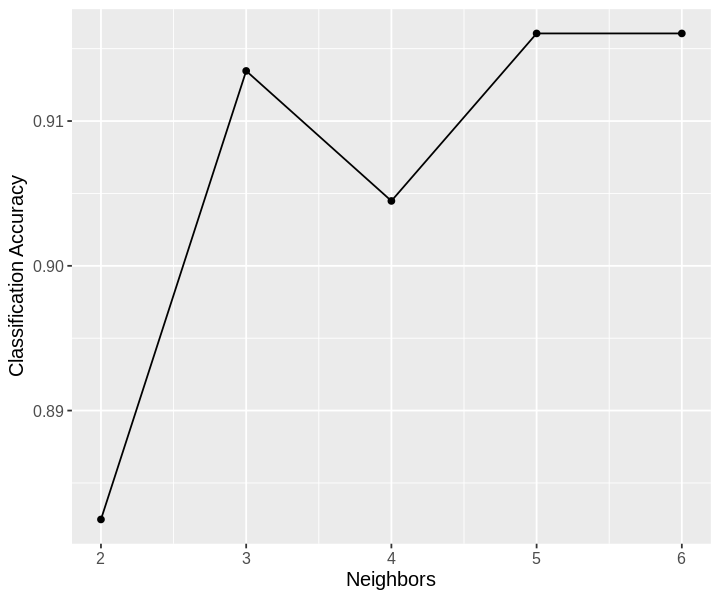

In [23]:
set.seed(1234) 

options(repr.plot.height = 5, repr.plot.width = 6)
if(any(is.na(trial)))
  trial <- na.omit(trial) 

training_recipe <- recipe (Risk ~ PARA_A + PARA_B + TOTAL + Money_Value, data = trial) |>
                    step_naomit(all_predictors()) |>  # Additional step to remove NA values
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

# KNN tuning specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Cross-validation setup
training_vfold <- vfold_cv(trial, v = 5, strata = Risk)

# KNN specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

# Fit model
training_fit <- workflow()|>
                add_recipe(training_recipe) |>
                add_model(knn_spec) |>
                fit_resamples(resamples = training_vfold)

# Tuning
k_values <- tibble(neighbors = 2:6)
knn_results <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(knn_tune) |>
                tune_grid(resamples = training_vfold, grid = k_values) |>
                collect_metrics()

# Extract accuracies
accuracies <- knn_results |>
                filter(.metric == "accuracy")

# Plot
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean, group = .metric)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Classification Accuracy") +
                    theme(text = element_text(size = 12))

cross_val_plot

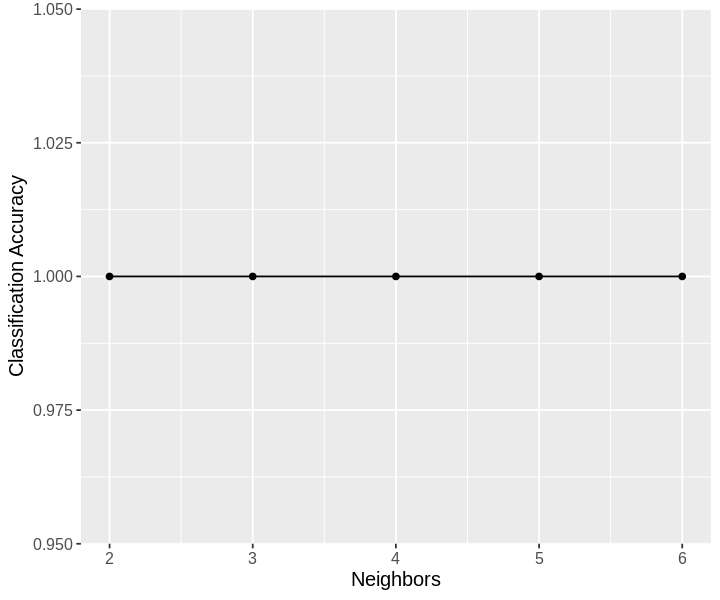

In [17]:
options(repr.plot.height = 5, repr.plot.width = 6)

training_recipe2 <- recipe (Risk ~ Score + History_score, data = trial)|>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

# KNN tuning specification
knn_tune2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Cross-validation setup
training_vfold2 <- vfold_cv(trial, v = 5, strata = Risk)

# KNN specification
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

# Fit model
training_fit2 <- workflow()|>
                add_recipe(training_recipe2) |>
                add_model(knn_spec2) |>
                fit_resamples(resamples = training_vfold)

# Tuning
k_values2 <- tibble(neighbors = 2:6)
knn_results2 <- workflow() |>
                add_recipe(training_recipe2) |>
                add_model(knn_tune2) |>
                tune_grid(resamples = training_vfold2, grid = k_values) |>
                collect_metrics()

# Extract accuracies
accuracies2 <- knn_results2 |>
                filter(.metric == "accuracy")

# Plot
cross_val_plot <- ggplot(accuracies2, aes(x = neighbors, y = mean, group = .metric)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Classification Accuracy") +
                    theme(text = element_text(size = 12))

cross_val_plot

In [15]:
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.8322581,4,0.012069863,Preprocessor1_Model1
3,accuracy,binary,0.8661290,4,0.006650170,Preprocessor1_Model2
4,accuracy,binary,0.8645161,4,0.006968538,Preprocessor1_Model3
5,accuracy,binary,0.8725806,4,0.006650170,Preprocessor1_Model4
6,accuracy,binary,0.8709677,4,0.006968538,Preprocessor1_Model5
